In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
import torch
import torch.utils.data
import torch.nn as nn
from tqdm import tqdm
DEVICE = "cuda"

/home/kleincode/miniconda3/envs/csmae/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_file = "train43.pkl"
test_file = "test43.pkl"
val_file = "val43.pkl"

In [3]:
with open(train_file, "rb") as f:
    train_keys, Y_train, X_train = pickle.load(f)
len(train_keys), Y_train.shape, X_train.shape

(269695, (269695, 43), (269695, 768))

In [4]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=DEVICE)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32, device=DEVICE)
train_set = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

In [5]:
with open(val_file, "rb") as f:
    val_keys, Y_val, X_val = pickle.load(f)
len(val_keys), Y_val.shape, X_val.shape

(123723, (123723, 43), (123723, 768))

In [6]:
X_val_tensor = torch.tensor(X_val, dtype=torch.float32, device=DEVICE)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32, device=DEVICE)
val_set = torch.utils.data.TensorDataset(X_val_tensor, Y_val_tensor)
val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)

In [7]:
model = nn.Linear(X_train.shape[-1], Y_train.shape[-1]).to(DEVICE)

In [8]:
criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=3e-4)

train_losses = []
val_losses = []
for epoch in range(10):
    # Training
    train_loss = 0.0
    for X_batch, Y_batch in tqdm(train_dataloader, desc=f"Epoch {epoch}"):
        Y_pred = model(X_batch)
        loss = criterion(Y_pred, Y_batch)
        optim.zero_grad()
        loss.backward()
        optim.step()
        train_loss += loss.item()
    train_loss /= len(train_dataloader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch} loss: {train_loss}")
    
    # Validation
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, Y_batch in tqdm(val_dataloader, desc=f"Validation {epoch}"):
            Y_pred = model(X_batch)
            loss = criterion(Y_pred, Y_batch)
            val_loss += loss.item()
    val_loss /= len(val_dataloader)
    val_losses.append(val_loss)
    print(f"Validation loss: {val_loss}")

Epoch 0:   0%|          | 0/4214 [00:00<?, ?it/s]

Epoch 0: 100%|██████████| 4214/4214 [00:04<00:00, 1038.62it/s]


Epoch 0 loss: 0.43014115182126816


Validation 0: 100%|██████████| 1934/1934 [00:00<00:00, 2667.17it/s]


Validation loss: 0.2958182940199863


Epoch 1: 100%|██████████| 4214/4214 [00:03<00:00, 1332.99it/s]


Epoch 1 loss: 0.22905543687349822


Validation 1: 100%|██████████| 1934/1934 [00:00<00:00, 2358.17it/s]


Validation loss: 0.17648849858600943


Epoch 2: 100%|██████████| 4214/4214 [00:03<00:00, 1334.95it/s]


Epoch 2 loss: 0.15477837596705699


Validation 2: 100%|██████████| 1934/1934 [00:00<00:00, 2409.28it/s]


Validation loss: 0.13227018689103


Epoch 3: 100%|██████████| 4214/4214 [00:03<00:00, 1285.94it/s]


Epoch 3 loss: 0.12800389728948694


Validation 3: 100%|██████████| 1934/1934 [00:00<00:00, 2482.20it/s]


Validation loss: 0.11663122158670931


Epoch 4: 100%|██████████| 4214/4214 [00:03<00:00, 1296.24it/s]


Epoch 4 loss: 0.11888617869797169


Validation 4: 100%|██████████| 1934/1934 [00:00<00:00, 2360.58it/s]


Validation loss: 0.11122282146044737


Epoch 5: 100%|██████████| 4214/4214 [00:03<00:00, 1280.62it/s]


Epoch 5 loss: 0.11576589522419181


Validation 5: 100%|██████████| 1934/1934 [00:00<00:00, 2464.59it/s]


Validation loss: 0.1092512587369723


Epoch 6: 100%|██████████| 4214/4214 [00:03<00:00, 1276.65it/s]


Epoch 6 loss: 0.11450311397637697


Validation 6: 100%|██████████| 1934/1934 [00:00<00:00, 2230.09it/s]


Validation loss: 0.10837487918719642


Epoch 7: 100%|██████████| 4214/4214 [00:03<00:00, 1282.01it/s]


Epoch 7 loss: 0.11381225351210618


Validation 7: 100%|██████████| 1934/1934 [00:00<00:00, 2497.54it/s]


Validation loss: 0.10776615805631155


Epoch 8: 100%|██████████| 4214/4214 [00:03<00:00, 1324.91it/s]


Epoch 8 loss: 0.11335946478066311


Validation 8: 100%|██████████| 1934/1934 [00:00<00:00, 2482.70it/s]


Validation loss: 0.10744729437051494


Epoch 9: 100%|██████████| 4214/4214 [00:03<00:00, 1267.49it/s]


Epoch 9 loss: 0.11302041913208997


Validation 9: 100%|██████████| 1934/1934 [00:00<00:00, 2283.14it/s]

Validation loss: 0.10710026153446114


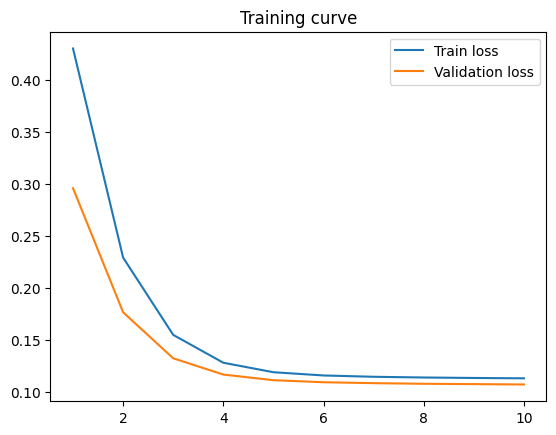

In [9]:
import matplotlib.pyplot as plt
x = np.arange(1, len(train_losses) + 1)
plt.plot(x, train_losses, label="Train loss")
plt.plot(x, val_losses, label="Validation loss")
plt.title("Training curve")
plt.legend()
plt.show()

In [10]:
progress = tqdm(train_dataloader, desc=f"Testing")
accs = []
for X_batch, Y_batch in progress:
    Y_pred = model(X_batch)
    acc = ((Y_pred > 0) == Y_batch).cpu().numpy().mean()
    accs.append(acc)
acc = np.mean(accs)
print(f"Training Accuracy: {acc:.2%}")

Testing: 100%|██████████| 4214/4214 [00:01<00:00, 2812.38it/s]

Training Accuracy: 95.42%


In [11]:
with open(test_file, "rb") as f:
    test_keys, Y_test, X_test = pickle.load(f)
len(test_keys), Y_test.shape, X_test.shape

(125866, (125866, 43), (125866, 768))

In [12]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=DEVICE)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32, device=DEVICE)
test_set = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

In [13]:
progress = tqdm(test_dataloader, desc=f"Testing")
preds = []
with torch.no_grad():
    for X_batch, Y_batch in progress:
        y_pred = model(X_batch)
        preds.append(y_pred.cpu().detach().numpy())
Y_pred = np.concatenate(preds)

Testing:   0%|          | 0/1967 [00:00<?, ?it/s]

Testing: 100%|██████████| 1967/1967 [00:00<00:00, 3165.62it/s]


In [15]:
from eval_utils import get_ben_report
get_ben_report(Y_test, Y_pred, logits=True)

Recall macro: 18.6%
Recall sample: 60.4%
Recall micro: 53.9%
F2 macro: 19.6%
F2 sample: 61.0%
F2 micro: 57.0%
Hamming loss: 4.5%


,precision,recall,f1-score,f2-score,support
Continuous urban fabric,0.580547,0.072321,0.128620,0.087671,2641.0
Discontinuous urban fabric,0.796531,0.463968,0.586379,0.506240,15736.0
Industrial or commercial units,0.579365,0.155983,0.245791,0.182683,2808.0
Road and rail networks and associated land,0.000000,0.000000,0.000000,0.000000,510.0
Port areas,0.000000,0.000000,0.000000,0.000000,80.0
Airports,0.000000,0.000000,0.000000,0.000000,137.0
Mineral extraction sites,0.000000,0.000000,0.000000,0.000000,478.0
Dump sites,0.000000,0.000000,0.000000,0.000000,83.0
Construction sites,0.000000,0.000000,0.000000,0.000000,159.0
Green urban areas,0.000000,0.000000,0.000000,0.000000,290.0
